<a href="https://colab.research.google.com/github/aimenbashir/Data-Science-and-AI-assignment/blob/main/Assignment_7%2C8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 7

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("/content/customer_churn_dataset-training-master.csv")

# Encode text columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# features (X) and target (y)
X = df.drop(['Churn', 'CustomerID'], axis=1)
y = df['Churn'].round().astype(int)   # ensure binary output

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(" Model Evaluation Metrics (Customer Churn)")
print("Accuracy :", round(accuracy * 100, 2), "%")
print("Precision:", round(precision * 100, 2), "%")
print("Recall   :", round(recall * 100, 2), "%")
print("F1 Score :", round(f1 * 100, 2), "%")


 Model Evaluation Metrics (Customer Churn)
Accuracy : 99.8 %
Precision: 99.81 %
Recall   : 99.99 %
F1 Score : 99.9 %


Assignment 8

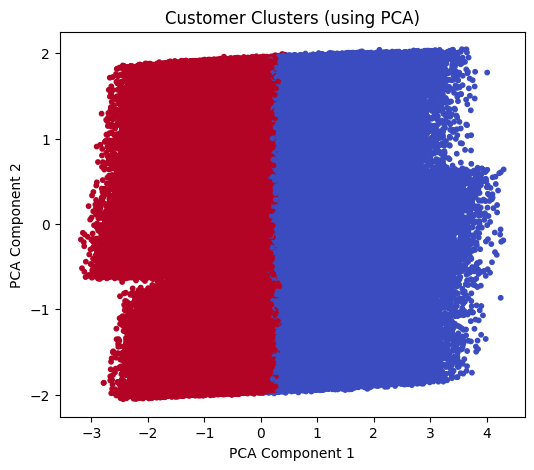

            Churn
Cluster          
0        0.966322
1        0.292463


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("/content/customer_churn_dataset-training-master.csv")

# Encode
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

X = df.drop(['CustomerID', 'Churn'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize clusters
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='coolwarm', s=10)
plt.title("Customer Clusters (using PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

print(df[['Churn', 'Cluster']].groupby('Cluster').mean())
